In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB7
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('drive/MyDrive/dataset')

sentiment_types = os.listdir('drive/MyDrive/dataset')

print(sentiment_types)

['Negative', 'Neutral', 'Positive']


In [3]:
sentiments = []

for item in sentiment_types:
  all_sentiments = os.listdir('drive/MyDrive/dataset'+'/'+item)

  for sentiment in all_sentiments:
    sentiments.append((item,str('drive/MyDrive/dataset'+'/'+item)+'/'+sentiment))
    print(sentiments)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('Negative', 'drive/MyDrive/dataset/Negative/69066454-4d14-4273-ac82-5c74ae5d25d6.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/690a97e6-327d-486d-85e3-9ea0bee241c8.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/688a1983-3c5f-4e6d-886f-8d5320fc3d45.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/693c37e0-15bc-49ee-8624-11c12de11931.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/696448cc-ceee-45de-95d8-5c4828d706a1.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/699f62d0-5a18-41fb-98ab-34d380d12a2d.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69980180-06ad-4561-b51d-870d1557a3b9.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69650639-0941-4156-a86e-45355a3c8194.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a16a130-0928-4e01-81ad-cd5b9ff37d4c.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a2598e6-4ad1-4956-b3cc-7fa5600a6256.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a041d04-5277-4424-994e-f66f4835ca55.jpg'), ('Negative', 'drive/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('Negative', 'drive/MyDrive/dataset/Negative/69066454-4d14-4273-ac82-5c74ae5d25d6.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/690a97e6-327d-486d-85e3-9ea0bee241c8.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/688a1983-3c5f-4e6d-886f-8d5320fc3d45.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/693c37e0-15bc-49ee-8624-11c12de11931.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/696448cc-ceee-45de-95d8-5c4828d706a1.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/699f62d0-5a18-41fb-98ab-34d380d12a2d.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69980180-06ad-4561-b51d-870d1557a3b9.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69650639-0941-4156-a86e-45355a3c8194.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a16a130-0928-4e01-81ad-cd5b9ff37d4c.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a2598e6-4ad1-4956-b3cc-7fa5600a6256.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a041d04-5277-4424-994e-f66f4835ca55.jpg'), ('Negative', 'drive/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[('Negative', 'drive/MyDrive/dataset/Negative/69066454-4d14-4273-ac82-5c74ae5d25d6.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/690a97e6-327d-486d-85e3-9ea0bee241c8.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/688a1983-3c5f-4e6d-886f-8d5320fc3d45.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/693c37e0-15bc-49ee-8624-11c12de11931.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/696448cc-ceee-45de-95d8-5c4828d706a1.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/699f62d0-5a18-41fb-98ab-34d380d12a2d.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69980180-06ad-4561-b51d-870d1557a3b9.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69650639-0941-4156-a86e-45355a3c8194.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a16a130-0928-4e01-81ad-cd5b9ff37d4c.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a2598e6-4ad1-4956-b3cc-7fa5600a6256.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a041d04-5277-4424-994e-f66f4835ca55.jpg'), ('Negative', 'drive

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('Negative', 'drive/MyDrive/dataset/Negative/69066454-4d14-4273-ac82-5c74ae5d25d6.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/690a97e6-327d-486d-85e3-9ea0bee241c8.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/688a1983-3c5f-4e6d-886f-8d5320fc3d45.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/693c37e0-15bc-49ee-8624-11c12de11931.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/696448cc-ceee-45de-95d8-5c4828d706a1.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/699f62d0-5a18-41fb-98ab-34d380d12a2d.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69980180-06ad-4561-b51d-870d1557a3b9.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69650639-0941-4156-a86e-45355a3c8194.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a16a130-0928-4e01-81ad-cd5b9ff37d4c.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a2598e6-4ad1-4956-b3cc-7fa5600a6256.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a041d04-5277-4424-994e-f66f4835ca55.jpg'), ('Negative', 'drive/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('Negative', 'drive/MyDrive/dataset/Negative/69066454-4d14-4273-ac82-5c74ae5d25d6.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/690a97e6-327d-486d-85e3-9ea0bee241c8.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/688a1983-3c5f-4e6d-886f-8d5320fc3d45.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/693c37e0-15bc-49ee-8624-11c12de11931.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/696448cc-ceee-45de-95d8-5c4828d706a1.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/699f62d0-5a18-41fb-98ab-34d380d12a2d.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69980180-06ad-4561-b51d-870d1557a3b9.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69650639-0941-4156-a86e-45355a3c8194.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a16a130-0928-4e01-81ad-cd5b9ff37d4c.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a2598e6-4ad1-4956-b3cc-7fa5600a6256.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a041d04-5277-4424-994e-f66f4835ca55.jpg'), ('Negative', 'drive/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('Negative', 'drive/MyDrive/dataset/Negative/69066454-4d14-4273-ac82-5c74ae5d25d6.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/690a97e6-327d-486d-85e3-9ea0bee241c8.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/688a1983-3c5f-4e6d-886f-8d5320fc3d45.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/693c37e0-15bc-49ee-8624-11c12de11931.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/696448cc-ceee-45de-95d8-5c4828d706a1.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/699f62d0-5a18-41fb-98ab-34d380d12a2d.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69980180-06ad-4561-b51d-870d1557a3b9.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/69650639-0941-4156-a86e-45355a3c8194.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a16a130-0928-4e01-81ad-cd5b9ff37d4c.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a2598e6-4ad1-4956-b3cc-7fa5600a6256.jpg'), ('Negative', 'drive/MyDrive/dataset/Negative/6a041d04-5277-4424-994e-f66f4835ca55.jpg'), ('Negative', 'drive/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
sentiments_df = pd.DataFrame(data = sentiments,columns=['sentiment type','image'])
print(sentiments_df.head())
print("Total number of sentiments",len(sentiments_df))

sentiment_count = sentiments_df['sentiment type'].value_counts()

print("sentiments in each catagory")
print(sentiment_count)

  sentiment type                                              image
0       Negative  drive/MyDrive/dataset/Negative/69066454-4d14-4...
1       Negative  drive/MyDrive/dataset/Negative/690a97e6-327d-4...
2       Negative  drive/MyDrive/dataset/Negative/688a1983-3c5f-4...
3       Negative  drive/MyDrive/dataset/Negative/693c37e0-15bc-4...
4       Negative  drive/MyDrive/dataset/Negative/696448cc-ceee-4...
Total number of sentiments 2432
sentiments in each catagory
Negative    1695
Positive     648
Neutral       89
Name: sentiment type, dtype: int64


In [61]:
import cv2 as cv
from matplotlib.pyplot import imshow
path = "drive/MyDrive/dataset/"
c = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
}
im_size = 64

images = []
labels = []

for i in sentiment_types:
  dataset_path=path+str(i)
  filenames = [i for i in os.listdir(dataset_path)]
  for f in filenames:
    img = cv.imread(dataset_path+'/'+f)
    img = cv.resize(img,(im_size,im_size))
    #img = cv.Canny(img,100,200)
    #imshow(img)
    img = preprocess_input(img)
    #imshow(img)
    images.append(img)
    labels.append(i)
images = np.array(images)
labels = np.array(labels)
images = images/255.0
images.shape

o_images = images
o_labels = labels

In [6]:
'''train_datagen = ImageDataGenerator(rescale = 1./255)
train_path = 'drive/MyDrive/dataset'
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (im_size, im_size),
                                                 batch_size = 8,
                                                 class_mode = 'sparse')
Y=training_set.classes'''

"train_datagen = ImageDataGenerator(rescale = 1./255)\ntrain_path = 'drive/MyDrive/dataset'\ntraining_set = train_datagen.flow_from_directory(train_path,\n                                                 target_size = (im_size, im_size),\n                                                 batch_size = 8,\n                                                 class_mode = 'sparse')\nY=training_set.classes"

In [62]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True)
train_dir = 'drive/MyDrive/dataset'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(im_size,im_size),
    batch_size=32,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

Found 2432 images belonging to 3 classes.


In [63]:
Y=train_generator.classes
print(Y)

[0 0 0 ... 2 2 2]


In [9]:
'''from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y = sentiments_df['sentiment type'].values

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)'''

"from sklearn.preprocessing import LabelEncoder,OneHotEncoder\ny = sentiments_df['sentiment type'].values\n\ny_labelencoder = LabelEncoder()\ny = y_labelencoder.fit_transform(y)\nprint(y)"

In [10]:
'''y=y.reshape(-1,1)
onehotencoder = OneHotEncoder(sparse=False)
Y = onehotencoder.fit_transform(y)
Y.shape'''

'y=y.reshape(-1,1)\nonehotencoder = OneHotEncoder(sparse=False)\nY = onehotencoder.fit_transform(y)\nY.shape'

In [11]:
#training_set.class_indices

In [64]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
images = images.reshape(images.shape[0],3*im_size*im_size)
ros = SMOTE(random_state = 50,sampling_strategy='not majority',k_neighbors=2)
#ros = RandomOverSampler(s)
images,Y = ros.fit_resample(images,Y)
print(images.shape)
print(Y.shape)
print(images.shape[0])
images = images.reshape(images.shape[0],im_size,im_size,3)

(5085, 12288)
(5085,)
5085


In [65]:
Neg,Neu,Pos = 0,0,0
for i in Y:
  if(i == 0):
    Neg+=1
  elif(i == 1):
    Neu+=1
  elif(i == 2):
    Pos+=1

print(Neg)
print(Neu)
print(Pos)

1695
1695
1695


In [14]:
#images = images.reshape(5085,224,224,3)

In [66]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#images,Y = shuffle(images,Y,random_state=5)

train_x,test_x,train_y,test_y = train_test_split(images,Y,test_size=0.2, random_state=50)
#sm = SMOTE('minority')
#train_x,train_y = mdo.fit_transform(np.copy(train_x), np.copy(train_y))
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(4068, 64, 64, 3)
(4068,)
(1017, 64, 64, 3)
(1017,)


In [67]:
img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [68]:
def get_top(x_input):
    """Block top operations
    This functions apply Batch Normalization and Leaky ReLU activation to the input.
    # Arguments:
        x_input: Tensor, input to apply BN and activation  to.
    # Returns:
        Output tensor
    """
    
    x = tf.keras.layers.BatchNormalization()(x_input)
    x = tf.keras.layers.LeakyReLU()(x)
    return x

def get_block(x_input, input_channels, output_channels):
    """MBConv block
    This function defines a mobile Inverted Residual Bottleneck block with BN and Leaky ReLU
    # Arguments
        x_input: Tensor, input tensor of conv layer.
        input_channels: Integer, the dimentionality of the input space.
        output_channels: Integer, the dimensionality of the output space.
            
    # Returns
        Output tensor.
    """

    x = tf.keras.layers.Conv2D(input_channels, kernel_size=(1, 1), padding='same', use_bias=False)(x_input)
    x = get_top(x)
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=(1, 3), padding='same', use_bias=False)(x)
    x = get_top(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), strides=(2, 1))(x)
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 1), padding='same', use_bias=False)(x)
    x = get_top(x)
    x = tf.keras.layers.Conv2D(output_channels, kernel_size=(2, 1), strides=(1, 2), padding='same', use_bias=False)(x)
    return x


def EffNet(input_shape, num_classes, plot_model=False):
    """EffNet
    This function defines a EfficientNet architecture.
    # Arguments
        input_shape: An integer or tuple/list of 3 integers, shape
            of input tensor.
        num_classes: Integer, number of classes.
        plot_model: Boolean, whether to plot model architecture or not
    # Returns
        EfficientNet model.
    """
    x_input = tf.keras.layers.Input(shape=input_shape)
    x = get_block(x_input, 32, 64)
    x = get_block(x, 64, 128)
    x = get_block(x, 128, 256)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=x_input, outputs=x)
    
    if plot_model:
        tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

    return model
model = EffNet((im_size,im_size,3),3)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 64, 64, 32)        96        
                                                                 
 batch_normalization_54 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_54 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 depthwise_conv2d_36 (Depthw  (None, 64, 64, 32)       96        
 iseConv2D)                                                      
                                                                 
 batch_normalization_55 (Bat  (None, 64, 64, 32)       128 

In [69]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
history = model.fit(
  train_x,
  train_y,
  validation_data=(test_x,test_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
128/128 [==============================] - 5s 30ms/step - loss: 0.7192 - accuracy: 0.7389 - val_loss: 1.1012 - val_accuracy: 0.3245
Epoch 2/10
128/128 [==============================] - 3s 27ms/step - loss: 0.3182 - accuracy: 0.8877 - val_loss: 1.1541 - val_accuracy: 0.3245
Epoch 3/10
128/128 [==============================] - 3s 27ms/step - loss: 0.1545 - accuracy: 0.9427 - val_loss: 1.1874 - val_accuracy: 0.3245
Epoch 4/10
128/128 [==============================] - 3s 26ms/step - loss: 0.1000 - accuracy: 0.9668 - val_loss: 0.8243 - val_accuracy: 0.6608
Epoch 5/10
128/128 [==============================] - 3s 26ms/step - loss: 0.0654 - accuracy: 0.9789 - val_loss: 0.5490 - val_accuracy: 0.8456
Epoch 6/10
128/128 [==============================] - 3s 27ms/step - loss: 0.0804 - accuracy: 0.9715 - val_loss: 0.9083 - val_accuracy: 0.8338
Epoch 7/10
128/128 [==============================] - 3s 26ms/step - loss: 0.1491 - accuracy: 0.9562 - val_loss: 1.0944 - val_accuracy: 0.8358

In [ ]:
model.save("new.h5")

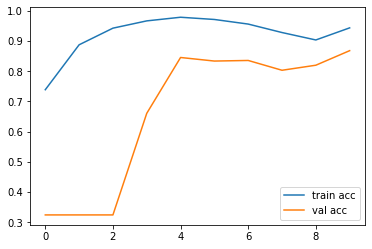

In [72]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

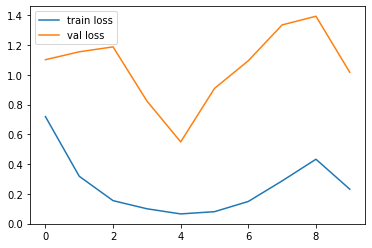

In [73]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [71]:
model.evaluate(test_x,test_y,batch_size=32)

32/32 [==============================] - 0s 7ms/step - loss: 1.0165 - accuracy: 0.8682


[1.0164722204208374, 0.8682399392127991]

In [75]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
import numpy as np
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,test_y))
print(confusion_matrix(y_pred,test_y))
f1_score(y_pred,test_y,average='weighted')

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       288
           1       0.99      0.98      0.98       365
           2       0.86      0.78      0.82       364

    accuracy                           0.87      1017
   macro avg       0.86      0.87      0.86      1017
weighted avg       0.87      0.87      0.87      1017

[[242   2  44]
 [  6 357   2]
 [ 78   2 284]]


0.8691281102460963

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing import image

images = ['00bf1649-7f48-44ce-b208-a648023bd65a.jpg','28480eff-e6be-4ab2-9343-ed05eb0b60d7.jpg','01af425e-61c8-4e5b-9cb4-bdff3f407037.jpg']
X = []
for img_path in images:
  img = cv.imread(img_path)
  img = cv.resize(img,(im_size,im_size))
  #img = cv.Canny(img,100,200)
  img = preprocess_input(img)
  x = np.array(img)
  x=x/255.0
  x = np.expand_dims(x,axis = 0)
  X.append(x)
  my_image = imread(img_path)
  plt.figure()
  imshow(my_image)

In [ ]:




labeling = ['Negative','Neutral','Positive']
for i in range (3):
  pred = model.predict(X[i])
  print(pred)
  print(labeling[np.argmax(pred)])

In [ ]:
model.save("vgg19_sampled_working.h5")